In [115]:
import pandas as pd 
import matplotlib.pyplot as plt 


%matplotlib inline

In [116]:
## Loading dan Review Data

In [126]:
df = pd.read_csv("./diabetes.csv")

In [118]:
df.shape

(768, 10)

In [119]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,True


In [127]:
df.isnull().values.any()

True

In [128]:
def plot_corr(df, size=9):
    corr= df.corr(numeric_only = [False])
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

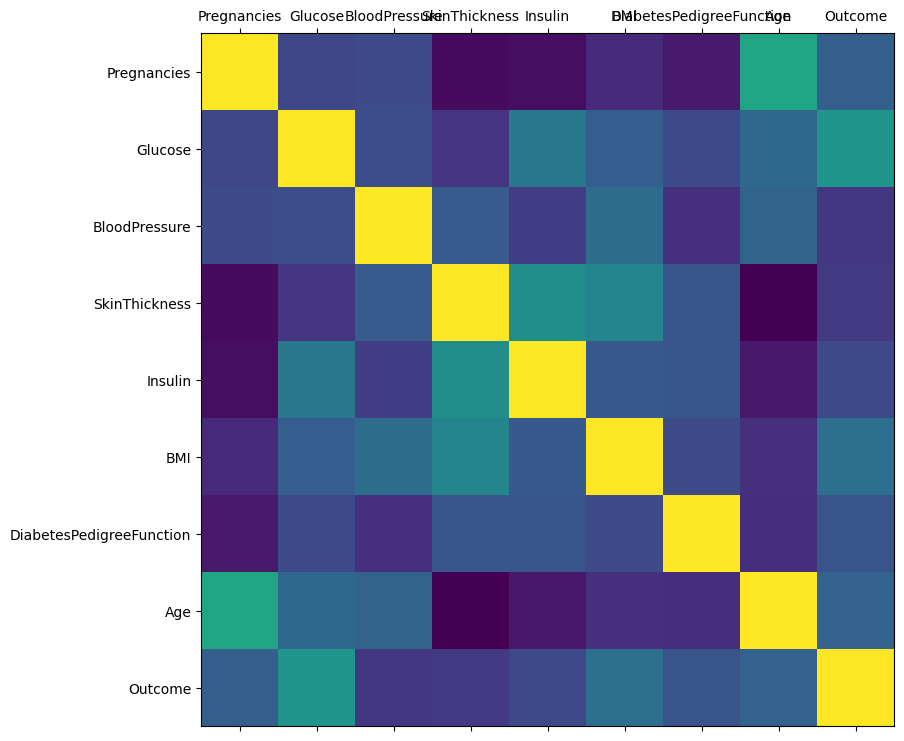

In [129]:
plot_corr(df)

In [130]:
df.corr(numeric_only = [False])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [131]:
del df['SkinThickness']

In [132]:
diabetes_maps = {True:1, False:0}
df['diabetes'] = df['diabetes'].map(diabetes_maps)

In [151]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,0,33.6,0.627,50,1,1.0
1,1,85,66,0,26.6,0.351,31,0,0.0
2,8,183,64,0,23.3,0.672,32,1,1.0
3,1,89,66,94,28.1,0.167,21,0,0.0
4,0,137,40,168,43.1,2.288,33,1,1.0


In [156]:
#replace nan data
df = df.fillna(0)

In [134]:
num_obs =len(df)
num_true = len(df.loc[df['diabetes'] == 1.0])
num_false = len(df.loc[df['diabetes'] == 0.0])
print("Jumlah terkena diabetes: {0}({1:2.2f}%)".format(num_true, (num_true/num_obs)* 100))
print("Jumlah tidak terkena diabetes: {0}({1:2.2f}%)".format(num_false, (num_false/ num_obs)* 100))

Jumlah terkena diabetes: 170(22.14%)
Jumlah tidak terkena diabetes: 170(22.14%)


In [57]:
from sklearn.model_selection import train_test_split

In [157]:
from sklearn.model_selection import train_test_split
#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'outcome', 'diabetes']
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'diabetes']
predicted_class_names = ['diabetes']
X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

print("y",y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=split_test_size, random_state=42)

y [[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [

In [145]:
print('{0:0.2f}% ada pada trainingset'.format(len(X_train)/len(df.index)*100))
print('{0:0.2f}% ada pada test set'.format(len(X_test)/len(df.index)*100))

69.92% ada pada trainingset
30.08% ada pada test set


In [146]:
print('{0}% original terkena diabetes'.format(len(df.loc[df['diabetes'] == 1]),len(df.loc[df['diabetes'] == 1])/(len(df.index))*100))
print('{1:2.2f}% original tidak terkena diabetes'.format(len(df.loc[df['diabetes'] == 0]),len(df.loc[df['diabetes'] == 0])/(len(df.index))*100))

170% original terkena diabetes
22.14% original tidak terkena diabetes


In [147]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,0,33.6,0.627,50,1,1.0
1,1,85,66,0,26.6,0.351,31,0,0.0
2,8,183,64,0,23.3,0.672,32,1,1.0
3,1,89,66,94,28.1,0.167,21,0,0.0
4,0,137,40,168,43.1,2.288,33,1,1.0


In [140]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing in glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))

# rows in dataframe 768
# rows missing in glucose_conc: 5


In [142]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing in glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("# rows missing in BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
# print("# rows missing in SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# rows missing in Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# rows missing in BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("# rows missing in DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("# rows missing in Age: {0}".format(len(df.loc[df['Age'] == 0])))
print("# rows missing in Outcome: {0}".format(len(df.loc[df['Outcome'] == 0])))

# rows in dataframe 768
# rows missing in glucose: 5
# rows missing in BloodPressure: 35
# rows missing in Insulin: 374
# rows missing in BMI: 11
# rows missing in DiabetesPedigreeFunction: 0
# rows missing in Age: 0
# rows missing in Outcome: 500


In [158]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
print("y_train", y_train)
print("X_train", X_train)

nb_model.fit(X_train, y_train.ravel())

y_train [[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [

GaussianNB()

In [159]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)

In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,True


In [93]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
diabetes                     object
dtype: object

In [94]:
del df['diabetes']

In [95]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.fillna(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [106]:
from sklearn.impute import SimpleImputer
import numpy as np
fill_0 = SimpleImputer(missing_values=np.NaN,strategy='mean')
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [160]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()